In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, io
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import cv2

In [232]:

def fcm(X, C, m, max_iter=100, error=1e-5, init=None):
    # Initialize membership matrix using K-means algorithm
    if init == 'kmeans':
        kmeans = KMeans(n_clusters=C)
        kmeans.fit(X)
        centroids = kmeans.cluster_centers_
        D = cdist(X, centroids)
        U = 1 / (D ** (2 / (m - 1)) + 1e-8)
        U = U / np.sum(U, axis=1, keepdims=True)
    else:
        # Initialize membership matrix randomly
        N = X.shape[0]
        U = np.random.rand(N, C)
        U = U / np.sum(U, axis=1, keepdims=True)
        centroids = None

    for i in range(max_iter):
        # Compute centroids
        centroids = U.T @ X / np.sum(U, axis=0, keepdims=True).T

        # Compute distance matrix
        D = cdist(X, centroids)

        # Compute membership matrix
        U_new = 1 / (D ** (2 / (m - 1)) + 1e-8)
        U_new = U_new / np.sum(U_new, axis=1, keepdims=True)

        # Check for convergence
        if np.linalg.norm(U_new - U) < error:
            break

        # Update membership matrix
        U = U_new

    return centroids, U

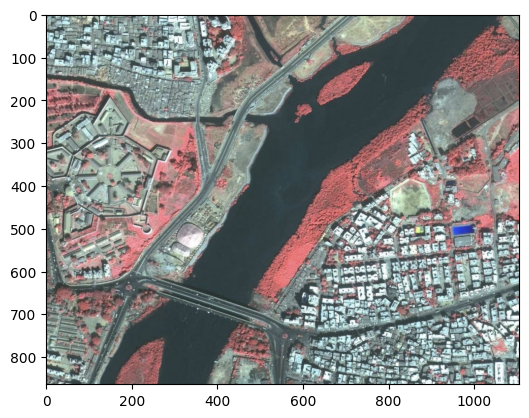

(864, 1106, 3)


In [233]:
# Load the sample image
image1 = io.imread('img5.jpeg')
image1=image1[:,:,:3]
plt.imshow(image1[:,:,:3])
plt.show()
print(image1.shape)
image = color.rgb2gray(image1)

In [234]:
# Normalize the image values
scaler = MinMaxScaler()
image = scaler.fit_transform(image)

In [235]:
# Flatten the image into a 2D array
X = image.reshape(-1, 1)

In [236]:
# Apply FCM clustering algorithm
C = 4  # Number of clusters
m = 2  # Fuzziness coefficient
max_iter = 100  # Maximum number of iterations
error = 1e-5  # Convergence threshold
centroids, U = fcm(X, C, m, max_iter, error, init='kmeans')

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [237]:
# Compute Silhouette score
labels = np.argmax(U, axis=1)
# score = silhouette_score(X, labels)

In [238]:
# Reshape the labels and centroids back to the original image shape
labels = labels.reshape(image.shape)
centroids = centroids.reshape((C,))

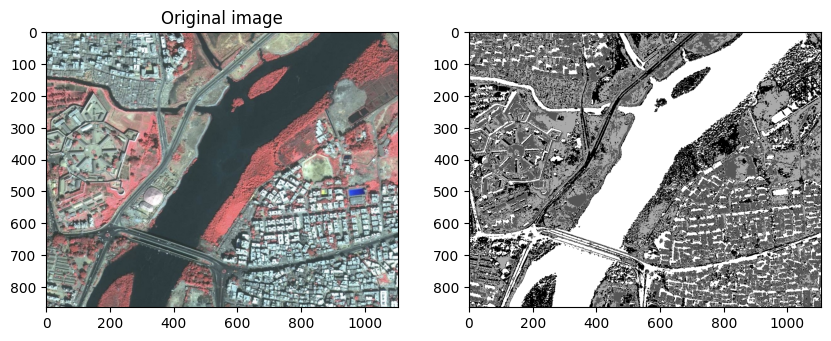

In [240]:
# Plot the original image and the segmented image
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.imshow(image1, cmap='gray')
ax0.set_title('Original image')

ax1.imshow(labels, cmap='gray')
# ax1.set_title(f'Segmented image (C={C}, score={score:.4f})')
for c in centroids:
    ax1.axhline(c, color='white')

plt.show()